# Agar pad simulations 

## This notebook is currently being updated, and is unfinished! 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import os
import pickle
from skimage.transform import rescale, rotate
import noise
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.insert(1, '/home/georgeos/Documents/GitHub/SyMBac/') # Not needed if you installed SyMBac using pip
from SyMBac.drawing import raster_cell
from SyMBac.colony_simulation import ColonySimulation

/home/georgeos/Documents/GitHub/SyMBac/SyMBac/colony_simulation.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
colonysim = ColonySimulation(
    cellmodeller_model= 'cellmodeller_ex1_simpleGrowth_modified.py',
    max_cells = 100,
    pix_mic_conv = 0.065,
    resize_amount = 3,
    save_dir = "test/"
)

In [6]:
colonysim.run_cellmodeller_sim(num_sim=1)

Set up OpenCL context:
  Platform: NVIDIA CUDA
  Device: Quadro RTX 3000
Importing model cellmodeller_ex1_simpleGrowth_modified
      10           2 cells           0 contacts    0.000371 hour(s) or 0.022243 minute(s) or 1.334590 second(s)
      20           2 cells           0 contacts    0.000378 hour(s) or 0.022680 minute(s) or 1.360794 second(s)
      30           2 cells           0 contacts    0.000385 hour(s) or 0.023112 minute(s) or 1.386701 second(s)
      40           2 cells           0 contacts    0.000392 hour(s) or 0.023541 minute(s) or 1.412431 second(s)
      50           2 cells           0 contacts    0.000399 hour(s) or 0.023969 minute(s) or 1.438124 second(s)
      60           4 cells           2 contacts    0.000497 hour(s) or 0.029847 minute(s) or 1.790849 second(s)
   60     4 cells       2 cts       2 iterations  residual = 0.000017
      70           4 cells           3 contacts    0.000514 hour(s) or 0.030858 minute(s) or 1.851503 second(s)
   70     4 cells 

In [6]:
colonysim.get_simulation_dirs()

['data/test/1', 'data/test/1_2']

In [7]:
pickles = colonysim.get_simulation_pickles()

In [8]:
colonysim.get_max_scene_size()

(2255, 1787)

In [13]:
colonysim.draw_simulation_OPL(n_jobs = -1, FL=True, density = 0.1, random_distribution = "uniform", distribution_args = (0.9, 3))

Scene Draw:: 0it [00:00, ?it/s]

In [17]:
from SyMBac.colony_renderer import ColonyRenderer

In [18]:
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import convolve_rescale
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

from skimage.exposure import rescale_intensity


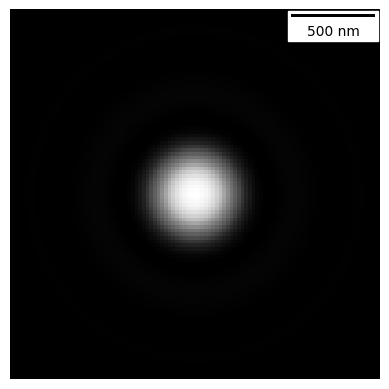

In [19]:
my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.75, 
    NA = 1.45, 
    n = 1.4, 
    resize_amount = 3, 
    pix_mic_conv = 0.065, 
    apo_sigma = 8, 
    mode="simple fluo", 
    condenser = "Ph3",
    offset = 0.02
)
my_kernel.calculate_PSF()
my_kernel.plot_PSF()


In [20]:
my_renderer = ColonyRenderer(colonysim, my_kernel)

In [21]:
test_img = my_renderer.render_scene(-1)

In [22]:
mask = my_renderer.mask_loader(-1)

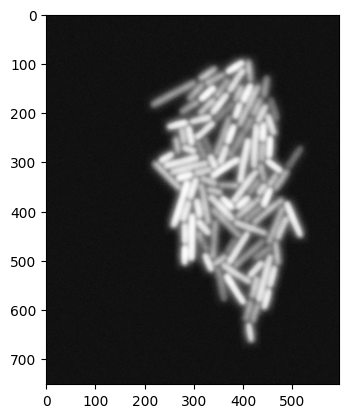

In [23]:
plt.imshow(test_img, cmap="Greys_r")

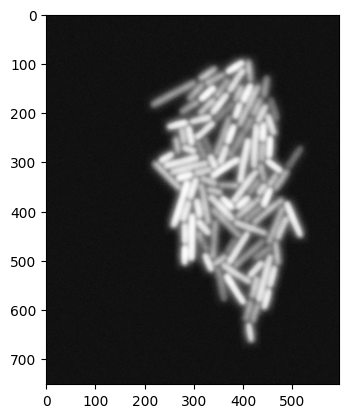

In [46]:
plt.imshow(np.roll(test_img, [0,], axis=[1]), cmap="Greys_r")

In [67]:
my_renderer.generate_random_samples(1000, 0.2, "training_data")

IndexError: list index out of range

In [62]:
import random
random.choice([(0, mask.shape[0]), (1, mask.shape[1]), ([0,1], mask.shape)])

([0, 1], (2255, 1787))